In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Projeto "Prevendo Nivel de Satisfação - Santander"
## Formação Cientista de Dados
### Projeto 02 - Curso de Big Data Analytics com Python e Spark




Autor: Alexadre Felix

Material de estudos e pesquisa, fique a vontade para copiar o código ou partes dele e modifica-los.
Em caso de reprodução, citar este arquivo fonte.

## 00 - Importacao e Conferencia dos Dados

In [2]:
arquivo = 'train.csv'
raw_data = pd.read_csv(arquivo)

raw_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# Conferindo os valores da coluna 'ID' pois parece ser uma lista de IDs unicos
raw_data['ID'].nunique()

76020

In [4]:
# Como não precisamos de valores de ID, iremos deletar a coluna do nosso dataset
raw_data = raw_data.drop(['ID'], axis = 1)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


Todas as colunas possuem valores numericos

In [6]:
# Conferindo se existem valores nulos no dataset
raw_data.isnull().sum(axis = 0)

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8            

In [7]:
raw_data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## 01 - Analise Exploratória dos Dados

In [8]:
raw_data.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

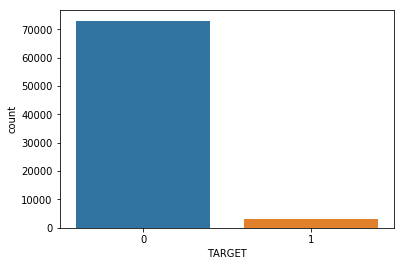

In [9]:
ax = sns.countplot(data = raw_data, x = 'TARGET')

Temos muito mais saídas de churn para não do que para sim, talvez seja necessário fazer o balanceamento das classes para apresentar os dados de treino.

In [10]:
# Verificando o skew
print(raw_data.skew())

var3                             -25.541574
var15                              1.578367
imp_ent_var16_ult1                67.267512
imp_op_var39_comer_ult1            9.454298
imp_op_var39_comer_ult3            9.735351
imp_op_var40_comer_ult1           45.834548
imp_op_var40_comer_ult3           38.671915
imp_op_var40_efect_ult1          149.528499
imp_op_var40_efect_ult3          112.951439
imp_op_var40_ult1                 52.578032
imp_op_var41_comer_ult1            9.226000
imp_op_var41_comer_ult3            9.546986
imp_op_var41_efect_ult1           36.667400
imp_op_var41_efect_ult3           61.994858
imp_op_var41_ult1                 20.996558
imp_op_var39_efect_ult1           36.249660
imp_op_var39_efect_ult3           61.422944
imp_op_var39_ult1                 20.476998
imp_sal_var16_ult1               181.054616
ind_var1_0                         9.181171
ind_var1                          16.211673
ind_var2_0                         0.000000
ind_var2                        

Devido ao alto numero de features a matriz de correlação não é o método mais apropriado para conseguirmos interpretar as correlações. Partiremos para outro método.

## 02 - Criação do Primeiro Modelo

### 02.1 - Pré Processamento
#### 02.1.1 - Normalização dos Dados

- Primeira versão do modelo utilizando normalização de dados.

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Criando dataset para o modelo

df_modelo = raw_data

# Separando o array em componentes de input e output
array_treino = df_modelo.values

x_treino = array_treino[:,0:-1]
y_treino = array_treino[:,-1]

# Separando os dados entre teste e treino

# Gerando os dados normalizados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x_treino)

In [12]:
rescaledX

array([[0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00154526],
       [0.99976406, 0.29      , 0.        , ..., 0.        , 0.        ,
        0.0020025 ],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00282212],
       ...,
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.003126  ],
       [0.99976406, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.00359128],
       [0.99976406, 0.41      , 0.        , ..., 0.        , 0.        ,
        0.00509076]])

#### 02.1.2 - Feature Selection

In [13]:
# Criando um novo dataset normalizado
indice_colunas = list(df_modelo.columns[:-1])

df_modelo_to_pca = pd.DataFrame(rescaledX, columns = indice_colunas)
df_modelo_to_pca['TARGET'] = df_modelo['TARGET']

df_modelo_to_pca.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545,0
1,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003,0
2,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822,0
3,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671,0
4,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091,0


In [14]:
df_modelo_to_pca.skew()

var3                             -25.541574
var15                              1.578367
imp_ent_var16_ult1                67.267512
imp_op_var39_comer_ult1            9.454298
imp_op_var39_comer_ult3            9.735351
imp_op_var40_comer_ult1           45.834548
imp_op_var40_comer_ult3           38.671915
imp_op_var40_efect_ult1          149.528499
imp_op_var40_efect_ult3          112.951439
imp_op_var40_ult1                 52.578032
imp_op_var41_comer_ult1            9.226000
imp_op_var41_comer_ult3            9.546986
imp_op_var41_efect_ult1           36.667400
imp_op_var41_efect_ult3           61.994858
imp_op_var41_ult1                 20.996558
imp_op_var39_efect_ult1           36.249660
imp_op_var39_efect_ult3           61.422944
imp_op_var39_ult1                 20.476998
imp_sal_var16_ult1               181.054616
ind_var1_0                         9.181171
ind_var1                          16.211673
ind_var2_0                         0.000000
ind_var2                        

In [16]:
# Para reducao de dimensionalidade será utilizado o metodo PCA - Principal Component Analysis
from sklearn.decomposition import PCA

# Carregando os dados
array_pca = df_modelo_to_pca.values

# Separando o array em componentes de input e output
x_treino_pca = array_pca[:,0:-1]
y_treino_pca = array_pca[:,-1]

# A selecao de atributos será feita em cima de todas as dimensoes
pca = PCA(n_components = None)
fit = pca.fit(x_treino_pca)

Text(0, 0.5, 'Variancia (%)')

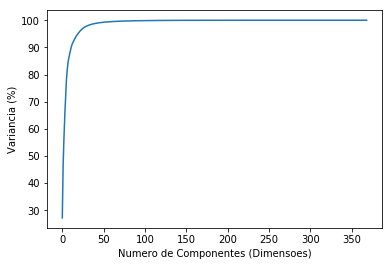

In [17]:
# Com todas as dimensoes podemos visualizar como as dimensoes se comportam explicando a variancia
# deste modo podemos ser mais assertivos quanto ao numero de componentes

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de Componentes (Dimensoes)")
plt.ylabel("Variancia (%)")

In [18]:
# Quantidade de componentes que podem explicar 99% da variancia

pca_ideal_components = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_ideal_components = (pca_ideal_components < 99.95).sum() + 1
pca_ideal_components

131

In [19]:
# Iremos considerar como sendo 4 o numero de dimensões do PCA, que captura cerca de 90% da variancia de nossos dados
pca_consolidado = PCA(n_components = pca_ideal_components)
x_treino_pca = pca_consolidado.fit_transform(x_treino_pca)

In [ ]:
# Com os dados pré processados é necessario retornar ao formato de Dataframe para o Modelo de Regressao Logistica
x_treino_pca = pd.DataFrame(x_treino_pca)
x_treino_pca.head()

#### 02.2 - Seleção do Modelo

In [ ]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 3

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('GNB', GaussianNB()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, x_treino_pca, y_treino_pca, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean() * 100, cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmosm
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

O modelo com melhor performance nos testes foi o LDA, prosseguiremos com ele.

### 02.3 - Ajuste de Hyperparametros
#### 02.3.1 - Grid Search Parameter Tuning

Nesta seção iremos criar exclusivamente o modelo LDA e fazer  ajuste e hypermarametros

In [48]:
from sklearn.model_selection import GridSearchCV

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

# Definindo os valores que serão testados
valores_grid = {'solver': ['svd','lsqr', 'eigen'], 'shrinkage': [0,0.01,0.1,0.25, 0.5, 0.75,1], 'store_covariance' : [True, False]  }

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, scoring = 'roc_auc')
grid.fit(x_treino_pca,y_treino_pca)

# Print do resultado
print("AUC: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 79.103
Melhores Parâmetros do Modelo:
 LinearDiscriminantAnalysis(shrinkage=0, solver='eigen', store_covariance=True)


### 02.4 - Treinamento do Modelo - Final

In [60]:
# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds)

# Criando o modelo
modelo_final_01 = LinearDiscriminantAnalysis(shrinkage=0, solver='eigen', store_covariance=True)

# Cross Validation
modelo_final_01_treinado = cross_val_score(modelo_final_01, x_treino_pca, y_treino_pca, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100), resultado.std())

Acurácia: 79.245 0.012941105152557076


## 03 - Criação do Segundo Modelo

### 03.1 - Pré Processamento

- Segunda versão do modelo utilizando padronização de dados.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Criando dataset para o modelo

df_modelo = raw_data

# Separando o array em componentes de input e output
array_treino = df_modelo.values

x_treino = array_treino[:,0:-1]
y_treino = array_treino[:,-1]

# Gerando o novo padrão
scaler = StandardScaler().fit(x_treino)
standardX = scaler.transform(x_treino)

# Aplicando PCA
pca = PCA(n_components = None)
fit = pca.fit(standardX)

# Analisando o nivel de significancia
pca_ideal_components = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_ideal_components = (pca_ideal_components < 99.95).sum() + 1

pca_consolidado = PCA(n_components = pca_ideal_components)
x_treino_pca = pca_consolidado.fit_transform(standardX)

### 02.2 - Seleção do Modelo

LR: 79.174567 (0.005336)
KNN: 64.579117 (0.006682)
CART: 56.646876 (0.004892)
LDA: 79.097501 (0.004769)
GNB: 52.944116 (0.001759)


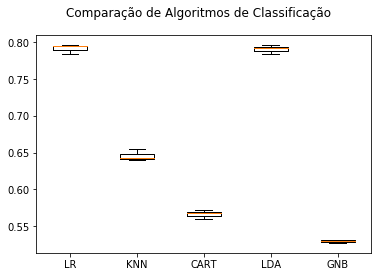

In [16]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 3

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('GNB', GaussianNB()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, x_treino_pca, y_treino, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean() * 100, cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### 02.3 - Ajuste dos Hyperarametros

In [19]:
from sklearn.model_selection import GridSearchCV

# Criando o modelo
modelo = LogisticRegression()

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, scoring = 'roc_auc')
grid.fit(x_treino_pca,y_treino)

# Print do resultado
print("AUC: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 79.430
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.01)


### 03.4 - Treinamento do Modelo - Final

In [22]:
# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds)

# Criando o modelo
modelo_final_02 = LogisticRegression(C=0.01)

# Cross Validation
modelo_final_02_treinado = cross_val_score(modelo_final_02, x_treino_pca, y_treino, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f" % (modelo_final_02_treinado.mean() * 100), modelo_final_02_treinado.std())

Acurácia: 79.554 0.011488306052135017


# 04 - Modelo Validado

In [ ]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Importando o dataset
arquivo = 'train.csv'
raw_data = pd.read_csv(arquivo)

# Criando dataset para o modelo
df_modelo = raw_data

# Separando o array em componentes de input e output
array_treino = df_modelo.values

x_treino = array_treino[:,0:-1]
y_treino = array_treino[:,-1]

# Gerando o novo padrão
scaler = StandardScaler().fit(x_treino)
standardX = scaler.transform(x_treino)

# Aplicando PCA
pca = PCA(n_components = None)
fit = pca.fit(standardX)

# Analisando o nivel de significancia
pca_ideal_components = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_ideal_components = (pca_ideal_components < 99.95).sum() + 1

pca_consolidado = PCA(n_components = pca_ideal_components)
x_treino_pca = pca_consolidado.fit_transform(standardX)


#### Criação do modelo ####

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds)

# Criando o modelo
modelo_log_reg = LogisticRegression(C=0.01)

# Cross Validation
modelo_treinado = cross_val_score(modelo_log_reg, x_treino_pca, y_treino, cv = kfold, scoring = 'roc_auc')

print("AUC: %.3f" % (modelo_treinado.mean() * 100), modelo_treinado.std())